In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *

In [2]:
df = pd.read_csv('pokemon.csv')

In [31]:
df.head()

,id,identifier,name,name_phonetic,species,name_jp,name_jp_romaji,species_jp,generation_id,ndex,...,exp_yield,base_happiness,egg_group1_id,egg_group2_id,is_baby,baby_breed_item_id,hatch_counter,lvl_100_exp,pokemon_order,legacy_id
0,1,bulbasaur,Bulbasaur,Bulbasaur,Seed,フシギダネ,Fushigidane,たね,1,1,...,64,70,1,7.0,0,NaN,20,1059860,1,1.0
1,2,ivysaur,Ivysaur,Ivysaur,Seed,フシギソウ,Fushigisou,たね,1,2,...,141,70,1,7.0,0,NaN,20,1059860,2,2.0
2,3,venusaur,Venusaur,Veenasore,Seed,フシギバナ,Fushigibana,たね,1,3,...,208,70,1,7.0,0,NaN,20,1059860,3,3.0
3,4,charmander,Charmander,Char-mander,Lizard,ヒトカゲ,Hitokage,とかげ,1,4,...,65,70,1,14.0,0,NaN,20,1059860,4,4.0
4,5,charmeleon,Charmeleon,Char-meeleon,Flame,リザード,Lizardo,かえん,1,5,...,142,70,1,14.0,0,NaN,20,1059860,5,5.0


In [3]:
print(df['generation_id'].value_counts())
obj = df['generation_id'].value_counts()
print(obj.values)

5    158
1    151
3    138
4    116
2    100
Name: generation_id, dtype: int64
[158 151 138 116 100]


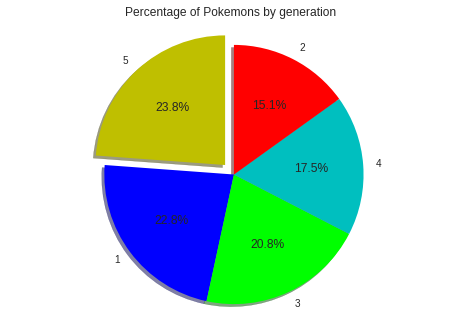

In [26]:
labels = 5, 1,3,4,2
sizes = [158, 151, 138, 116, 100]
colors = ['Y', 'B', '#00ff00', 'C', 'R']
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 3rd slice 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Pokemons by generation")
plt.plot()
plt.show()

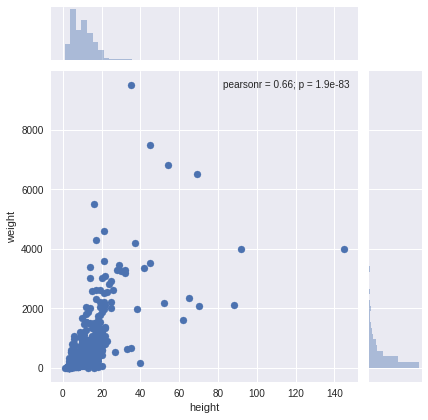

In [15]:
sns.jointplot(x="height", y="weight", data=df);
sns.plt.show() #Most pokemons are short and lightweight

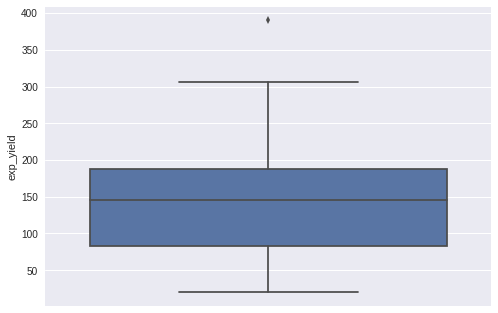

In [27]:
sns.boxplot(y="exp_yield", data=df); #Experience distribution
sns.plt.show()

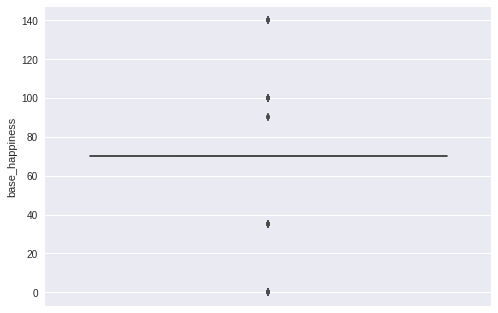

In [30]:
sns.boxplot(y="base_happiness", data=df); #Experience distribution
sns.plt.show() #happiness level is the same for most pokemons

In [22]:
pkmn = pd.melt(df, id_vars=["name", "type1_id"], value_vars=["exp_yield"], var_name="Stat")

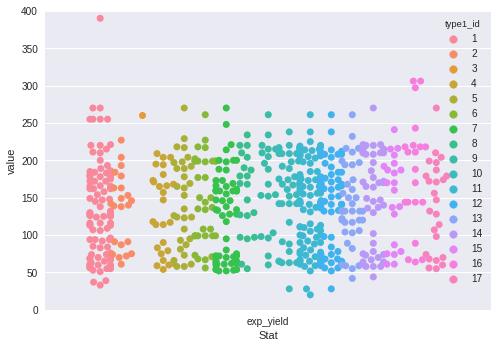

In [24]:
plt.ylim(0, 400)
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="type1_id", split=True, size=7);
sns.plt.show() #Experience by type1

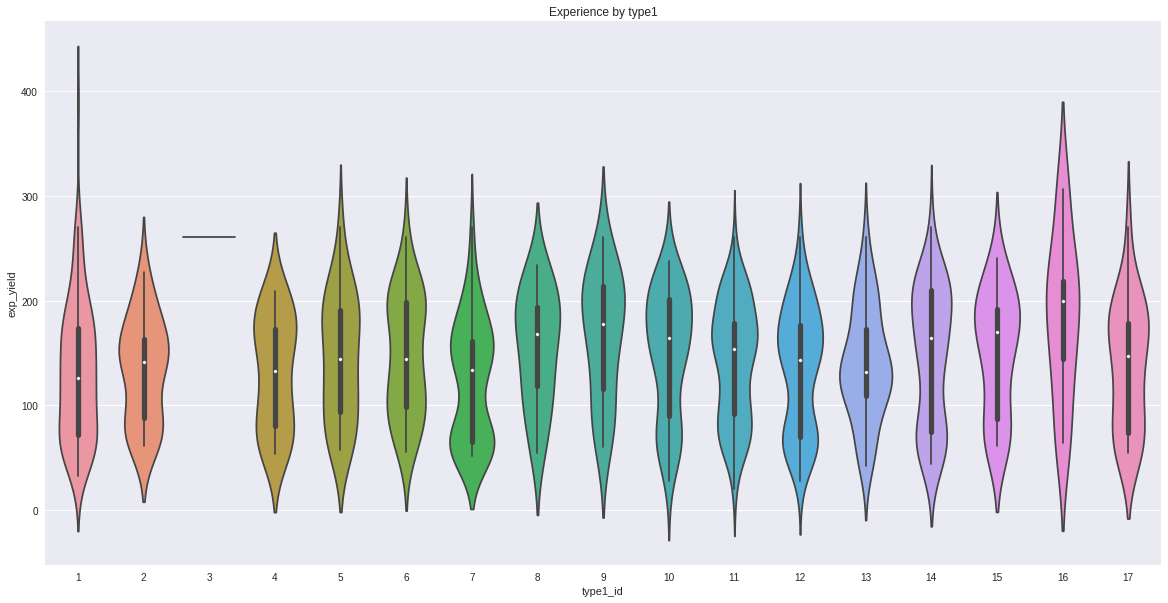

In [32]:
plt.subplots(figsize = (20,10))
plt.title('Experience by type1')
sns.violinplot(x = "type1_id", y = "exp_yield",data = df)

plt.show()

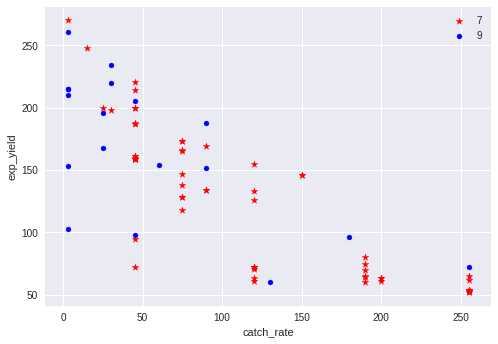

In [33]:
fire=df[(df['type1_id']==7)] #fire contains all fire pokemons
water=df[(df['type1_id']==9)]  #all water pokemins
plt.scatter(fire.catch_rate.head(90), fire.exp_yield.head(90),color='R',label='7',marker="*",s=50) #scatter plot
plt.scatter(water.catch_rate.head(90), water.exp_yield.head(90),color='B',label="9",s=25)
plt.xlabel("catch_rate") 
plt.ylabel("exp_yield")
plt.legend()
plt.plot()
plt.show()
#type 7 is more likely to be caught, type 9 shows more experience

In [8]:
pkmn = pd.melt(df, id_vars=["name", "type2_id"], value_vars=["exp_yield"], var_name="Stat")

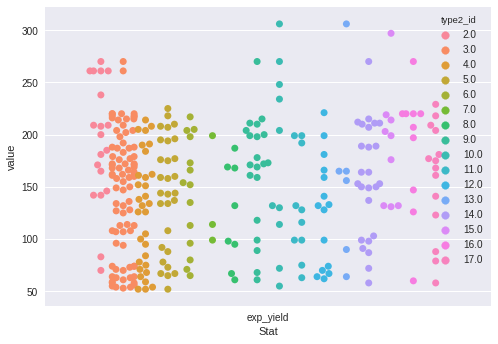

In [9]:
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="type2_id",split=True, size=7);
sns.plt.show()#Experience by type2

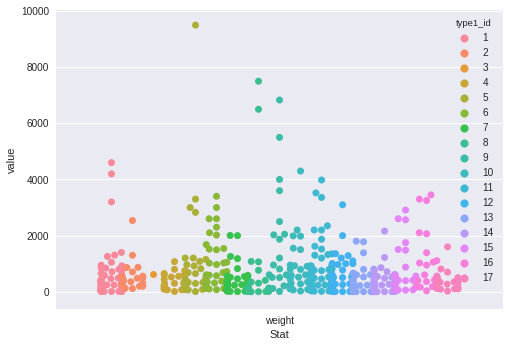

In [29]:
pkmn = pd.melt(df, id_vars=["name", "type1_id"], value_vars=["weight"], var_name="Stat")
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="type1_id",split=True, size=7);
sns.plt.show()#Weight by type1

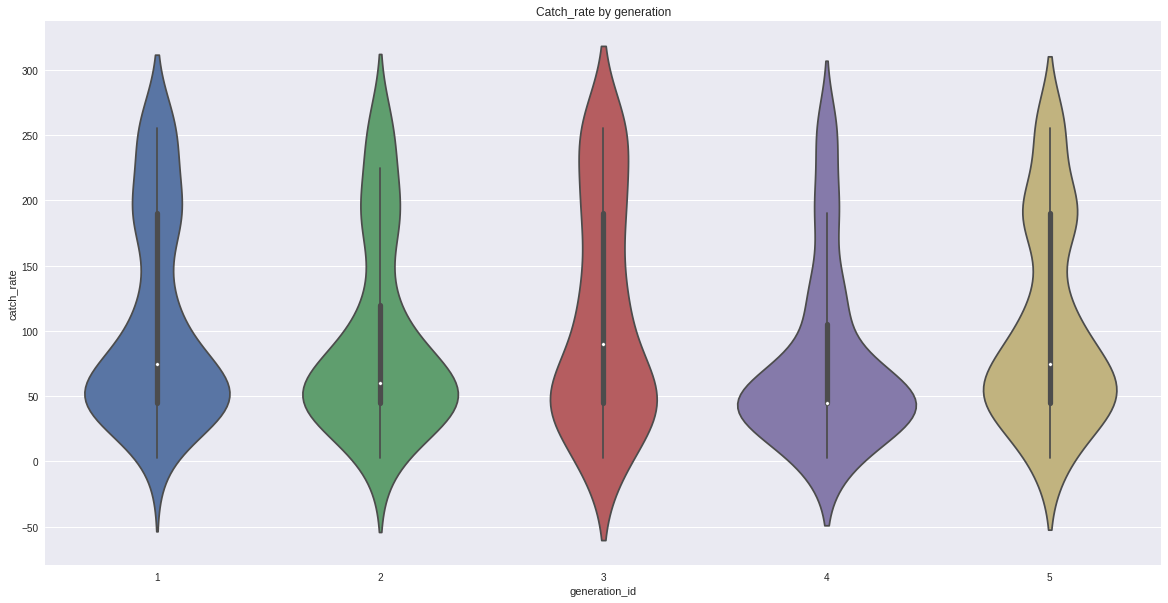

In [13]:
plt.subplots(figsize = (20,10))
plt.title('Catch_rate by generation')
sns.violinplot(x = "generation_id", y = "catch_rate",data = df)

plt.show() #Catch rate mostly is around median for all generations

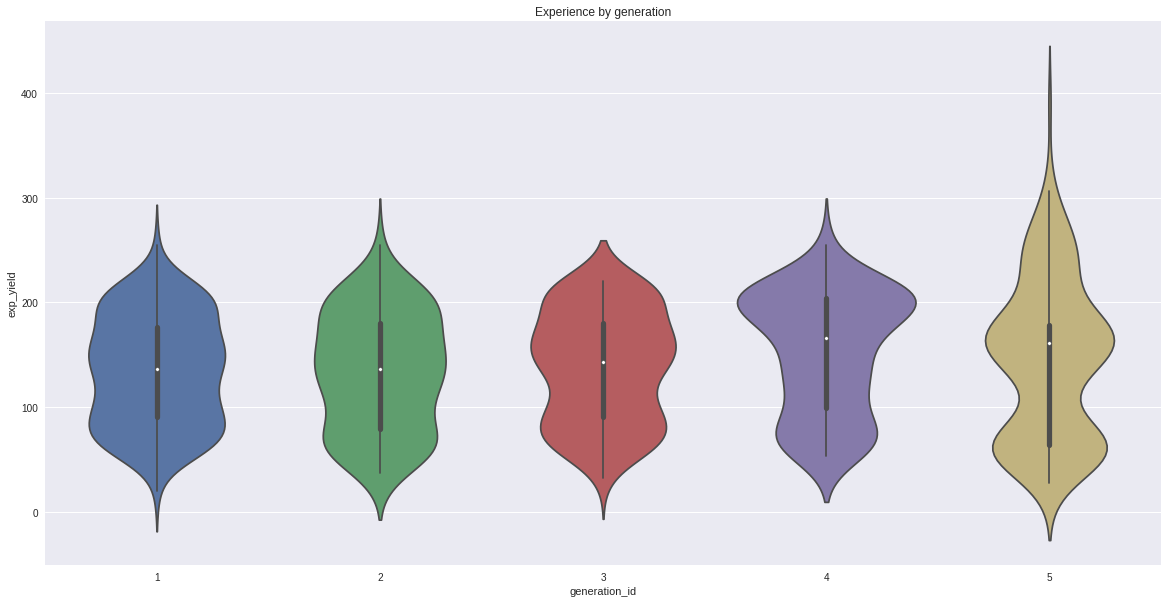

In [14]:
plt.subplots(figsize = (20,10))
plt.title('Experience by generation')
sns.violinplot(x = "generation_id", y = "exp_yield",data = df)
plt.show() #Experience in 4th and 5th generation is more uneven then in previous ones